# Esercizio 11.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Usando pochi dati di training e un basso numero di epoche la retta ottenuta risulta  distante da quella desiderata.

Applicando anche del rumore, la rete risulta ancora meno performante. Per ottenere un buon fit è stato necessario aumentare sia i dati sia le epoche.
Osserviamo che l'avere un numero di dati di training elevato sembra essere più incidente dell'avere un elevato numero di epoche (confronto tra 100 training points-50 epochs e 1000 training points-10 epochs)


<img src="grafici/5.png">

<img src="grafici/6.png">

<img src="grafici/4.png">

<img src="grafici/1.png">

<img src="grafici/2.png">

# Codice utilizzato

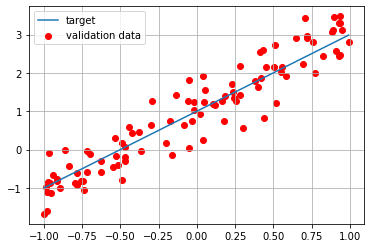

In [6]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect


# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)



# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [8]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/30
1000/1000 [==============================] - 1s 521us/sample - loss: 0.8473 - mse: 0.8473 - val_loss: 0.5302 - val_mse: 0.5302
Epoch 2/30
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4163 - mse: 0.4163 - val_loss: 0.3138 - val_mse: 0.3138
Epoch 3/30
1000/1000 [==============================] - 0s 47us/sample - loss: 0.2924 - mse: 0.2924 - val_loss: 0.2490 - val_mse: 0.2490
Epoch 4/30
1000/1000 [==============================] - 0s 47us/sample - loss: 0.2560 - mse: 0.2560 - val_loss: 0.2267 - val_mse: 0.2267
Epoch 5/30
1000/1000 [==============================] - 0s 47us/sample - loss: 0.2443 - mse: 0.2443 - val_loss: 0.2194 - val_mse: 0.2194
Epoch 6/30
1000/1000 [==============================] - 0s 47us/sample - loss: 0.2409 - mse: 0.2409 - val_loss: 0.2143 - val_mse: 0.2143
Epoch 7/30
1000/1000 [==============================] - 0s 49us/sample - loss: 0.2390 - mse: 0.2390 - val_loss: 0.2118 - val_mse: 

In [10]:
# return weights and biases
model.get_weights()

[array([[2.0051215]], dtype=float32), array([1.0092064], dtype=float32)]

In [11]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

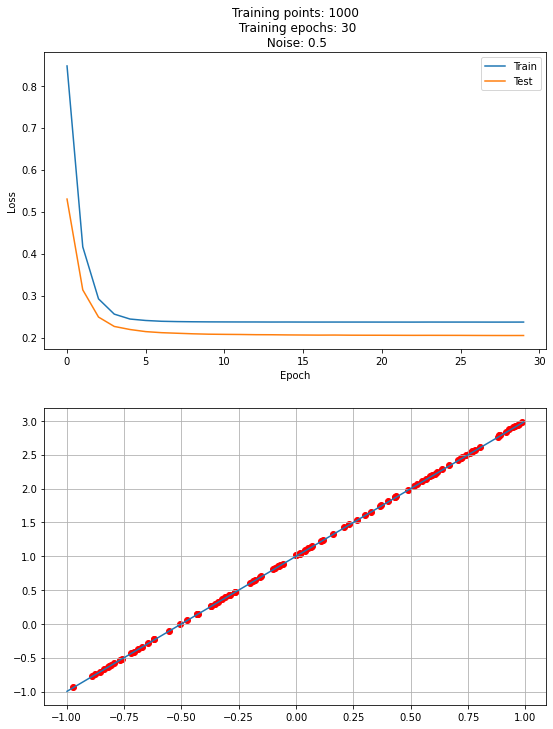

In [12]:
# look into training history
# Plot training & validation loss values


fig=plt.figure(figsize=(9, 12))

plt.subplot(2,1,1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training points: 1000'
          '\n Training epochs: 30'
          '\n Noise: 0.5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(2,1,2)


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)



plt.show()